In [1]:
# import expression data
# generate regulon matrix
# generate TF-TF ineraction network

In [2]:
# read data. This is log2 (TPM+1)
import pandas
import scipy, scipy.stats
import seaborn

# 0. user defined variables

In [3]:
expression_data_file = '/home/adrian/projects/vigur/results/transcriptomics/deseq2_filtered/strict_union_log2TPMplusOne.tsv'
cat_responders_file = '/home/adrian/projects/vigur/results/transcriptomics/dose/grni_target_genes.txt'

# 1. read data

## 1.1. read expression (log2 TPM +1)

In [4]:
df = pandas.read_csv(expression_data_file, sep='\t', index_col=0)
print(df.shape)
df.head()

(308, 10)


,Gene name,[Cat.] = 0 uM | Time = 0 h,[Cat.] = 0 uM | Time = 4 h,[Cat.] = 0 uM | Time = 24 h,[Cat.] = 0.5 uM | Time = 4 h,[Cat.] = 0.5 uM | Time = 24 h,[Cat.] = 5 uM | Time = 4 h,[Cat.] = 5 uM | Time = 24 h,[Cat.] = 50 uM | Time = 4 h,[Cat.] = 50 uM | Time = 24 h
ENSEMBL,,,,,,,,,,
ENSG00000267647,MAP1LC3P,0.000,2.512,0.892,1.717,0.312,3.307,0.715,2.430,0.553
ENSG00000268854,CTD-2545M3.2,0.000,1.895,0.000,3.078,0.000,0.000,0.000,1.263,0.000
ENSG00000234061,AC007969.4,0.000,2.999,2.231,0.740,1.484,2.833,1.319,1.447,1.454
ENSG00000223764,RP11-54O7.3,0.079,2.650,0.169,2.234,0.165,2.212,0.186,2.151,0.177
ENSG00000274995,RP11-321F6.2,0.107,2.468,0.308,2.469,0.075,2.709,0.126,2.669,0.184


## 1.2. read responder genes

In [5]:
cat = pandas.read_csv(cat_responders_file, sep='\n', header=None)
responders = cat[0].to_list()
print(responders, len(responders))

['ENSG00000023171', 'ENSG00000109321', 'ENSG00000004799', 'ENSG00000172572', 'ENSG00000121966', 'ENSG00000119508', 'ENSG00000272841', 'ENSG00000153234', 'ENSG00000159167', 'ENSG00000120875', 'ENSG00000156427', 'ENSG00000116761', 'ENSG00000181634', 'ENSG00000095752', 'ENSG00000123977', 'ENSG00000174343', 'ENSG00000141404', 'ENSG00000003989', 'ENSG00000185186', 'ENSG00000255112', 'ENSG00000267165', 'ENSG00000120833', 'ENSG00000175505', 'ENSG00000095794', 'ENSG00000105825', 'ENSG00000176641', 'ENSG00000107099', 'ENSG00000273077', 'ENSG00000280191', 'ENSG00000269952', 'ENSG00000140678', 'ENSG00000281491', 'ENSG00000244358', 'ENSG00000228997', 'ENSG00000258943', 'ENSG00000117479', 'ENSG00000233148', 'ENSG00000230300', 'ENSG00000261114', 'ENSG00000211448', 'ENSG00000135346', 'ENSG00000027869', 'ENSG00000178726', 'ENSG00000140519', 'ENSG00000187479', 'ENSG00000226935', 'ENSG00000108551', 'ENSG00000154319', 'ENSG00000237649', 'ENSG00000146374', 'ENSG00000028137', 'ENSG00000127951', 'ENSG000001

# 2. analysis

## 2.1. intersect expression with responders

In [6]:
res = df.loc[responders]
print(res.shape)
res.head()

(154, 10)


,Gene name,[Cat.] = 0 uM | Time = 0 h,[Cat.] = 0 uM | Time = 4 h,[Cat.] = 0 uM | Time = 24 h,[Cat.] = 0.5 uM | Time = 4 h,[Cat.] = 0.5 uM | Time = 24 h,[Cat.] = 5 uM | Time = 4 h,[Cat.] = 5 uM | Time = 24 h,[Cat.] = 50 uM | Time = 4 h,[Cat.] = 50 uM | Time = 24 h
ENSEMBL,,,,,,,,,,
ENSG00000023171,GRAMD1B,1.223,1.379,1.017,6.552,2.549,6.764,2.519,6.588,2.789
ENSG00000109321,AREG,1.339,1.311,1.755,6.596,2.465,6.442,2.649,6.521,2.301
ENSG00000004799,PDK4,2.201,1.290,2.104,5.291,2.816,5.752,3.387,5.403,2.915
ENSG00000172572,PDE3A,0.397,0.466,0.425,2.695,0.925,3.149,1.191,2.848,0.971
ENSG00000121966,CXCR4,5.930,2.162,4.924,5.396,5.691,5.558,5.665,6.120,6.146


## 2.2. reindex

In [7]:
res.set_index('Gene name', inplace=True)

In [8]:
res.columns

Index(['[Cat.] = 0 uM | Time = 0 h', '[Cat.] = 0 uM | Time = 4 h',
       '[Cat.] = 0 uM | Time = 24 h', '[Cat.] = 0.5 uM | Time = 4 h',
       '[Cat.] = 0.5 uM | Time = 24 h', '[Cat.] = 5 uM | Time = 4 h',
       '[Cat.] = 5 uM | Time = 24 h', '[Cat.] = 50 uM | Time = 4 h',
       '[Cat.] = 50 uM | Time = 24 h'],
      dtype='object')

In [9]:
res.drop(['[Cat.] = 0 uM | Time = 0 h', '[Cat.] = 0 uM | Time = 24 h', '[Cat.] = 0.5 uM | Time = 24 h', '[Cat.] = 5 uM | Time = 24 h', '[Cat.] = 50 uM | Time = 24 h'], axis=1, inplace=True)

In [10]:
mu = res.mean(axis=1)
s = res.std(axis=1)
zscore = res.sub(mu, axis=0).div(s, axis=0)
zscore.head()

,[Cat.] = 0 uM | Time = 4 h,[Cat.] = 0.5 uM | Time = 4 h,[Cat.] = 5 uM | Time = 4 h,[Cat.] = 50 uM | Time = 4 h
Gene name,,,,
GRAMD1B,-1.499069,0.468251,0.548876,0.481942
AREG,-1.499563,0.529156,0.470041,0.500366
PDK4,-1.493463,0.407092,0.626077,0.460295
PDE3A,-1.482268,0.329619,0.698662,0.453988
CXCR4,-1.477342,0.327616,0.418031,0.731695


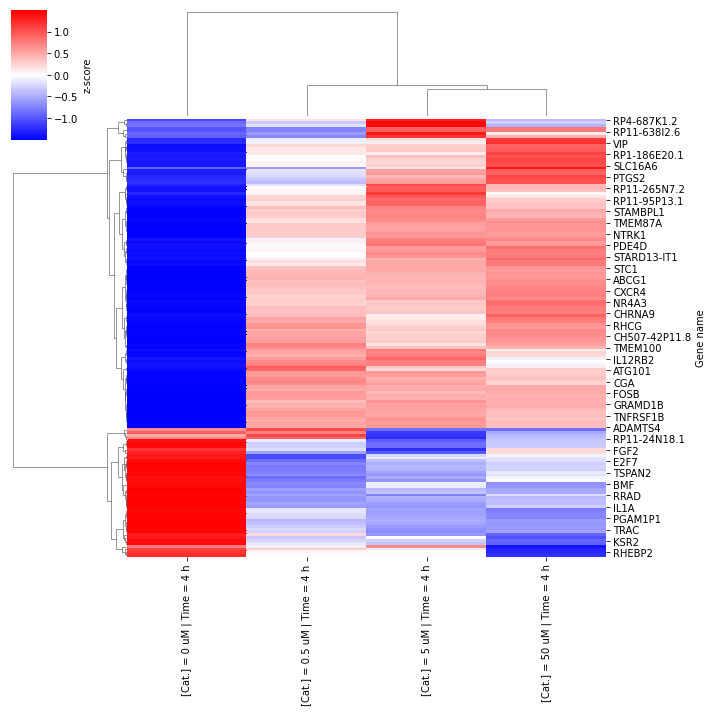

In [11]:
g = seaborn.clustermap(zscore, cmap='bwr', method='ward', metric='euclidean', yticklabels=4, cbar_kws={'label':'z-score'})

In [14]:
# zscore to riia
print(zscore.index.to_list())

['GRAMD1B', 'AREG', 'PDK4', 'PDE3A', 'CXCR4', 'NR4A3', 'RP3-428L16.2', 'NR4A2', 'STC1', 'DUSP4', 'FGF18', 'CTH', 'TNFSF15', 'IL11', 'DAW1', 'CHRNA9', 'GNAL', 'SLC7A2', 'LINC00313', 'CHMP1B', 'RP11-78A19.3', 'SOCS2', 'CLCF1', 'CREM', 'TFPI2', 'RNF152', 'DOCK8', 'RP11-130C6.1', 'CH507-42P11.5', 'RP11-324I22.3', 'ITGAX', 'DNAJB5-AS1', 'RP11-88H10.2', 'RP1-186E20.1', 'RP11-696D21.2', 'SLC19A2', 'SYF2P2', 'STARD13-IT1', 'RP11-325K4.2', 'DIO2', 'CGA', 'SH2D2A', 'THBD', 'RHCG', 'C11orf96', 'LINC00161', 'RASD1', 'FAM167A', 'KIFC1', 'RSPO3', 'TNFRSF1B', 'FGL2', 'DNASE1L3', 'FOSB', 'STAMBPL1', 'AGTR1', 'AKTIP', 'NPTX1', 'CASP9', 'SORBS1', 'ZCCHC12', 'IKZF2', 'PTHLH', 'GPRC5A', 'PIK3R3', 'KLF4', 'IL1B', 'ADAMTS4', 'CH507-42P11.8', 'TMEM100', 'PPP1R3C', 'ADAMTS1', 'SMOX', 'APOLD1', 'ABCG1', 'TGFA', 'HERPUD1', 'CCNH', 'RP11-638I2.6', 'NTRK1', 'RP11-265N7.2', 'IL12RB2', 'SULT1E1', 'HR', 'RP3-523E19.2', 'RP11-95P13.1', 'RRM2', 'SLC15A2', 'RP11-879F14.2', 'SCN3B', 'PDE4D', 'MYPN', 'SULT1B1', 'LRRC1', 